In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
from pmdarima import auto_arima

In [3]:
data_final = pd.read_excel(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\2W_2023.xlsx")
#data = data.iloc[6:-1,:]
data_final.shape

(162, 28)

In [4]:
data_final.isnull().sum()

Date                        0
2W Sales                   24
Wholesale trading (mil)    24
Retail trading(mil)        24
M1                         24
M3                         24
BEI                        24
IIP                        24
PMI                        24
CC                         24
WPI                        24
GDP Rs. Millions           24
CMR                        24
Vloans                     24
Ind_freight                24
Diesel Rates               24
Season_Index               24
GVA Mining                 24
GVA_Cons                   24
GVA_Manu                   24
Evnt_Pos                   24
Evnt_Negative              24
COSPI                      24
Agriculture                24
Electricity                24
Construction               24
Trade                      24
Real estate                24
dtype: int64

In [5]:
data_final.columns

Index(['Date', '2W Sales', 'Wholesale trading (mil)', 'Retail trading(mil)',
       'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI', 'GDP Rs. Millions', 'CMR',
       'Vloans', 'Ind_freight', 'Diesel Rates', 'Season_Index', 'GVA Mining',
       'GVA_Cons', 'GVA_Manu', 'Evnt_Pos ', 'Evnt_Negative', 'COSPI',
       'Agriculture', 'Electricity', 'Construction ', 'Trade', 'Real estate'],
      dtype='object')

In [6]:
## Setting the index to year_month - this will help in mapping the predictions to the correct year-month
data_final.set_index('Date',inplace=True)

In [17]:
columns_to_forecast = ['Retail trading(mil)','BEI', 'IIP', 'PMI', 'COSPI']

In [18]:
data= data_final.filter(columns_to_forecast).copy()
data.shape

(162, 5)

In [19]:
data

,Retail trading(mil),BEI,IIP,PMI,COSPI
Date,,,,,
2011-07-01,20086.0,121.5,100.31,52.1,2646905.3
2011-08-01,20086.0,121.5,100.31,52.8,2518331.2
2011-09-01,20086.0,121.5,100.31,53.1,2481991.1
2011-10-01,20882.0,118.8,100.31,52.8,2728697.7
2011-11-01,20882.0,118.8,100.31,51.3,2508661.5
...,...,...,...,...,...
2024-08-01,NaN,NaN,NaN,NaN,NaN
2024-09-01,NaN,NaN,NaN,NaN,NaN
2024-10-01,NaN,NaN,NaN,NaN,NaN


24 Retail trading(mil)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=2585.520, Time=0.27 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2778.688, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2596.024, Time=0.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2690.206, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2794.474, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2610.352, Time=0.07 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=2585.481, Time=0.32 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=2597.826, Time=0.31 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=2587.459, Time=1.89 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=2587.445, Time=1.77 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=2586.086, Time=1.31 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=2593.890, Time=0.96 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=2589.809, Time=1.33 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.58 sec
 

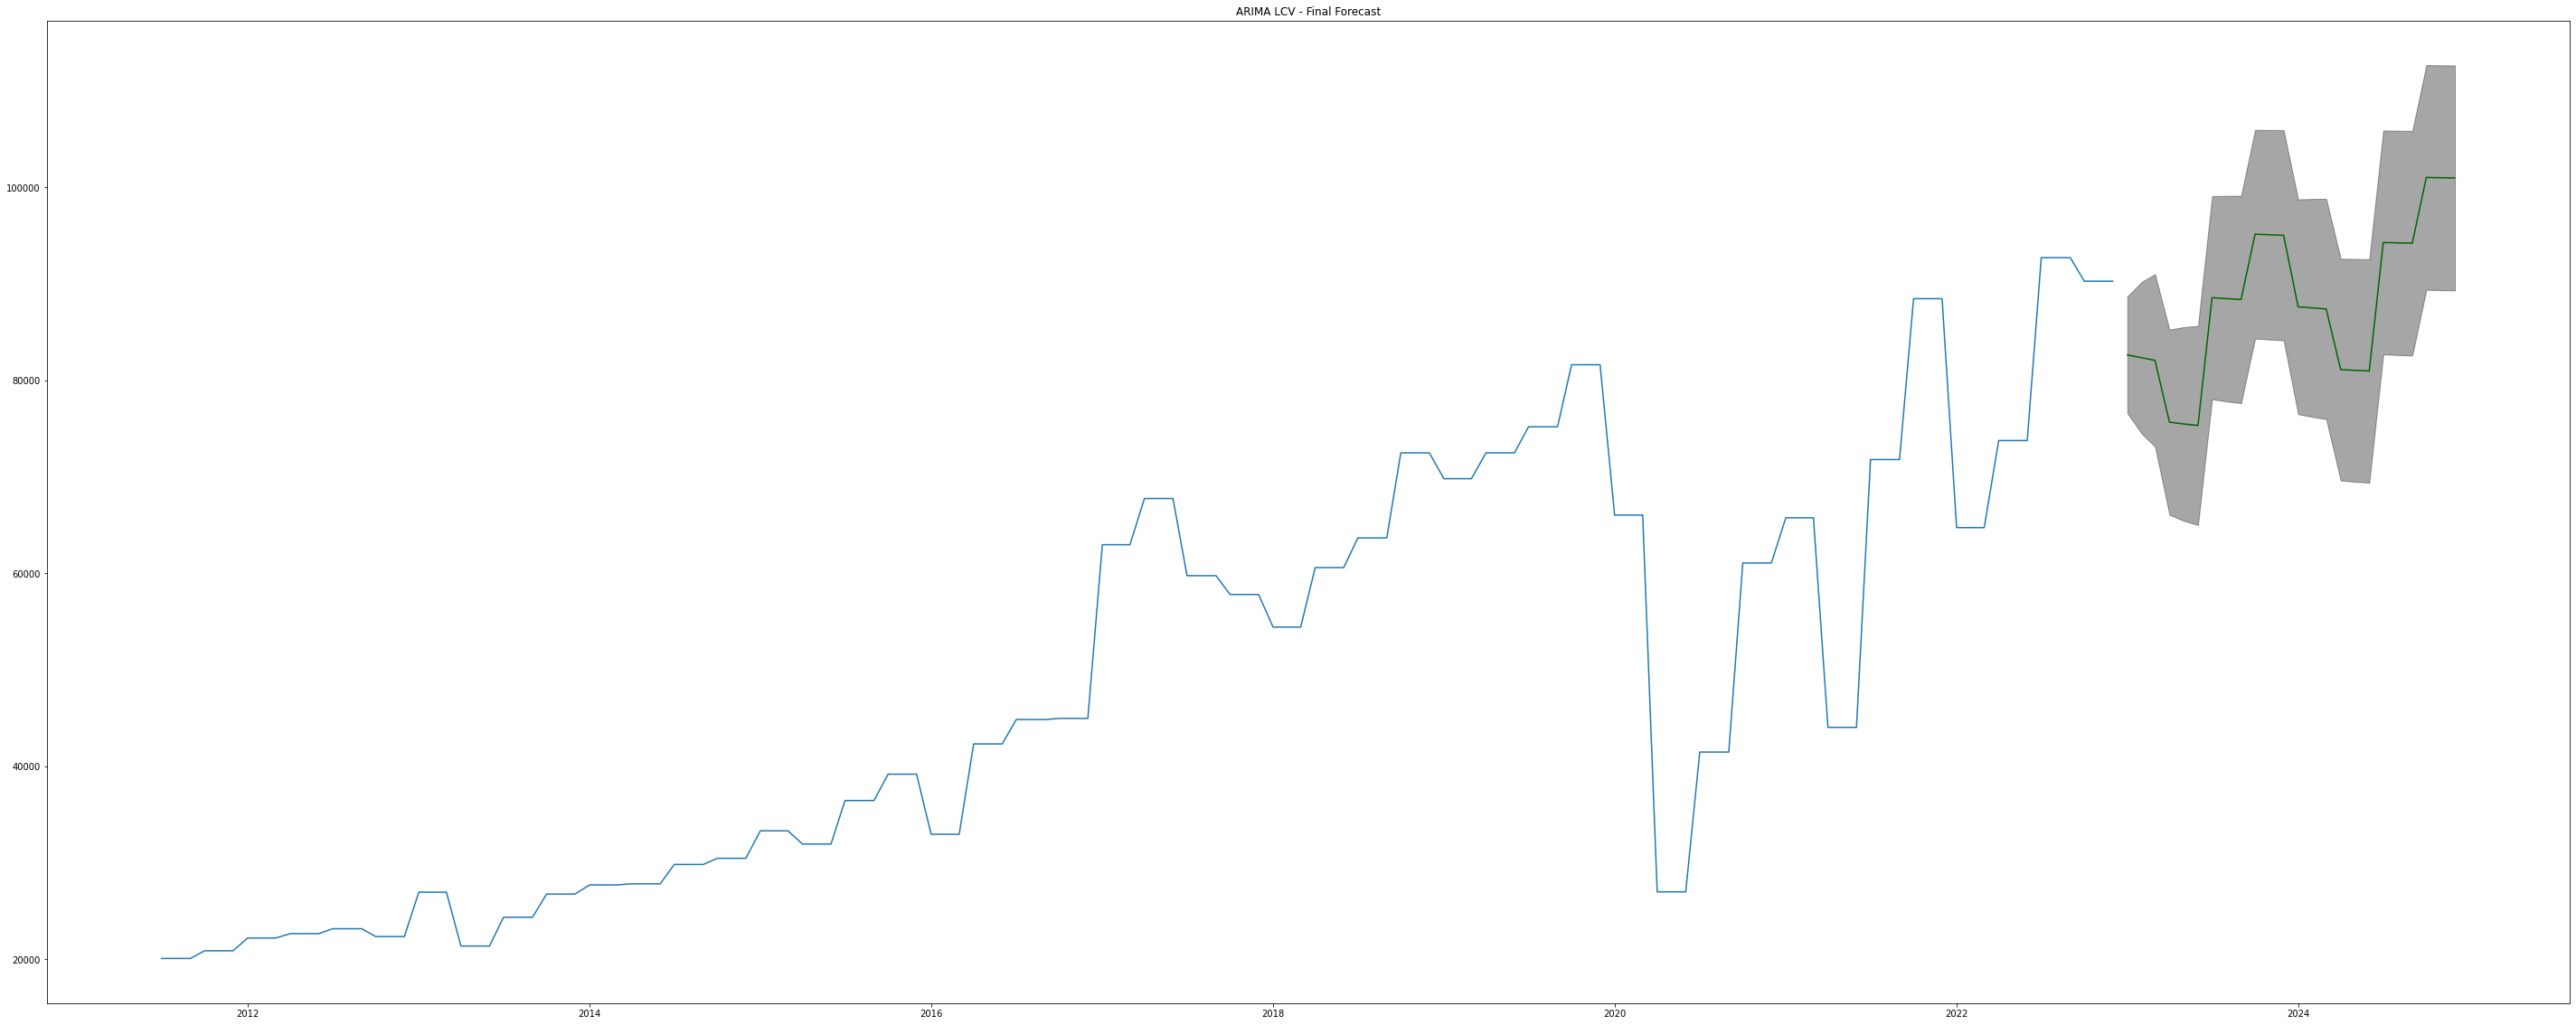

24 BEI
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=916.489, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=599.546, Time=0.23 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=918.709, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=641.433, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=578.422, Time=0.69 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=595.679, Time=0.97 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=569.631, Time=0.62 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=2.36 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=568.339, Time=1.10 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(2,0,0)(0,1,2)[12] intercept   : AIC=570.336, Time=1.64 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=570

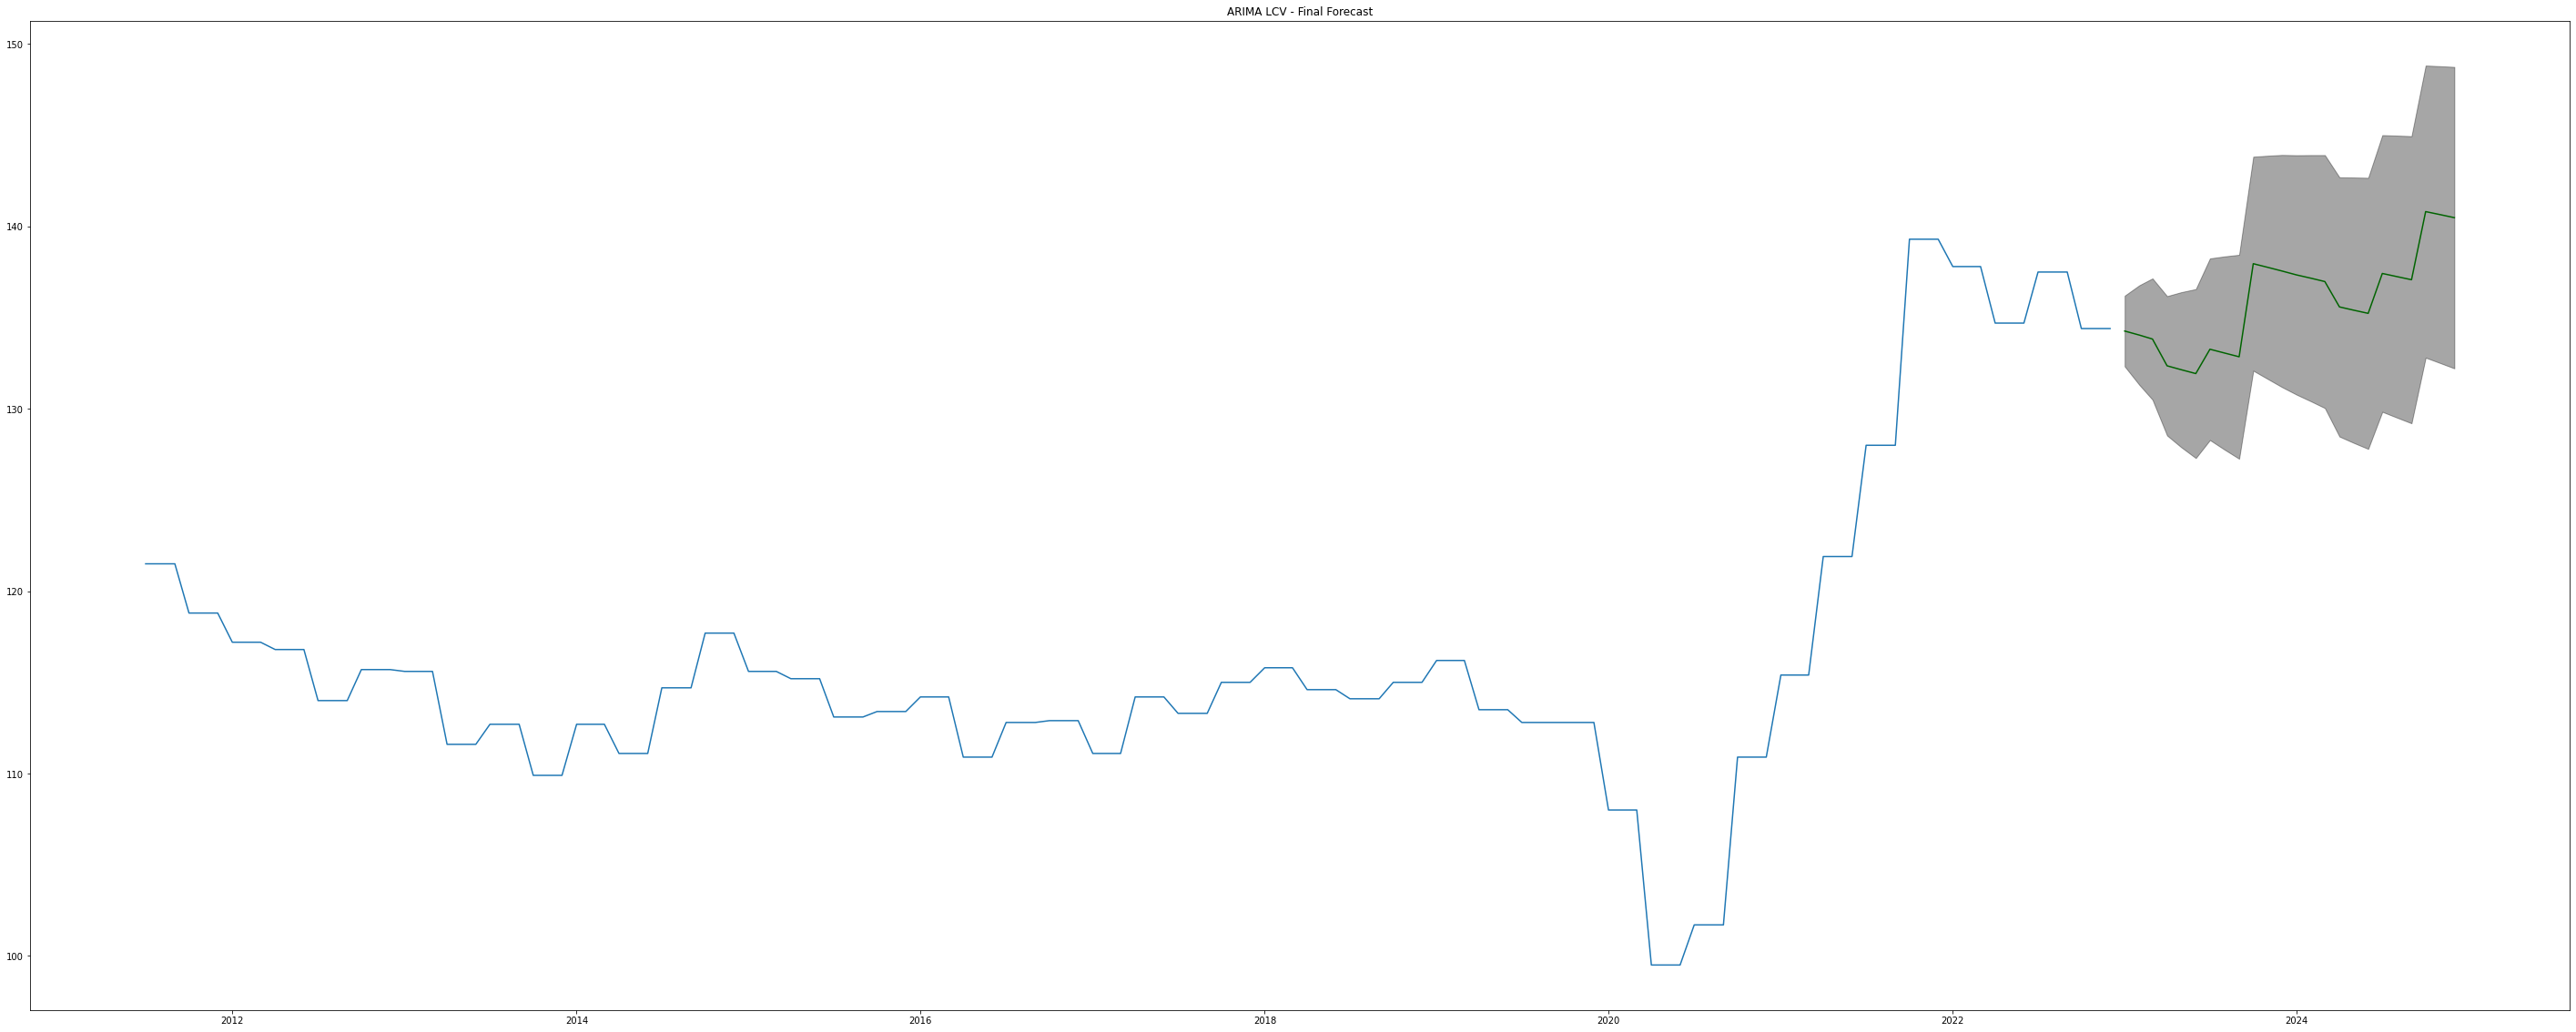

24 IIP
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1070.847, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=955.101, Time=0.26 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1068.860, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=984.797, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=937.859, Time=1.34 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.70 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1041.654, Time=0.67 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=939.240, Time=2.12 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=939.034, Time=1.81 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=973.706, Time=0.92 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=940.682, Time=2.01 sec
 ARIMA(1,0,0)(2,1,0)[12]             : 

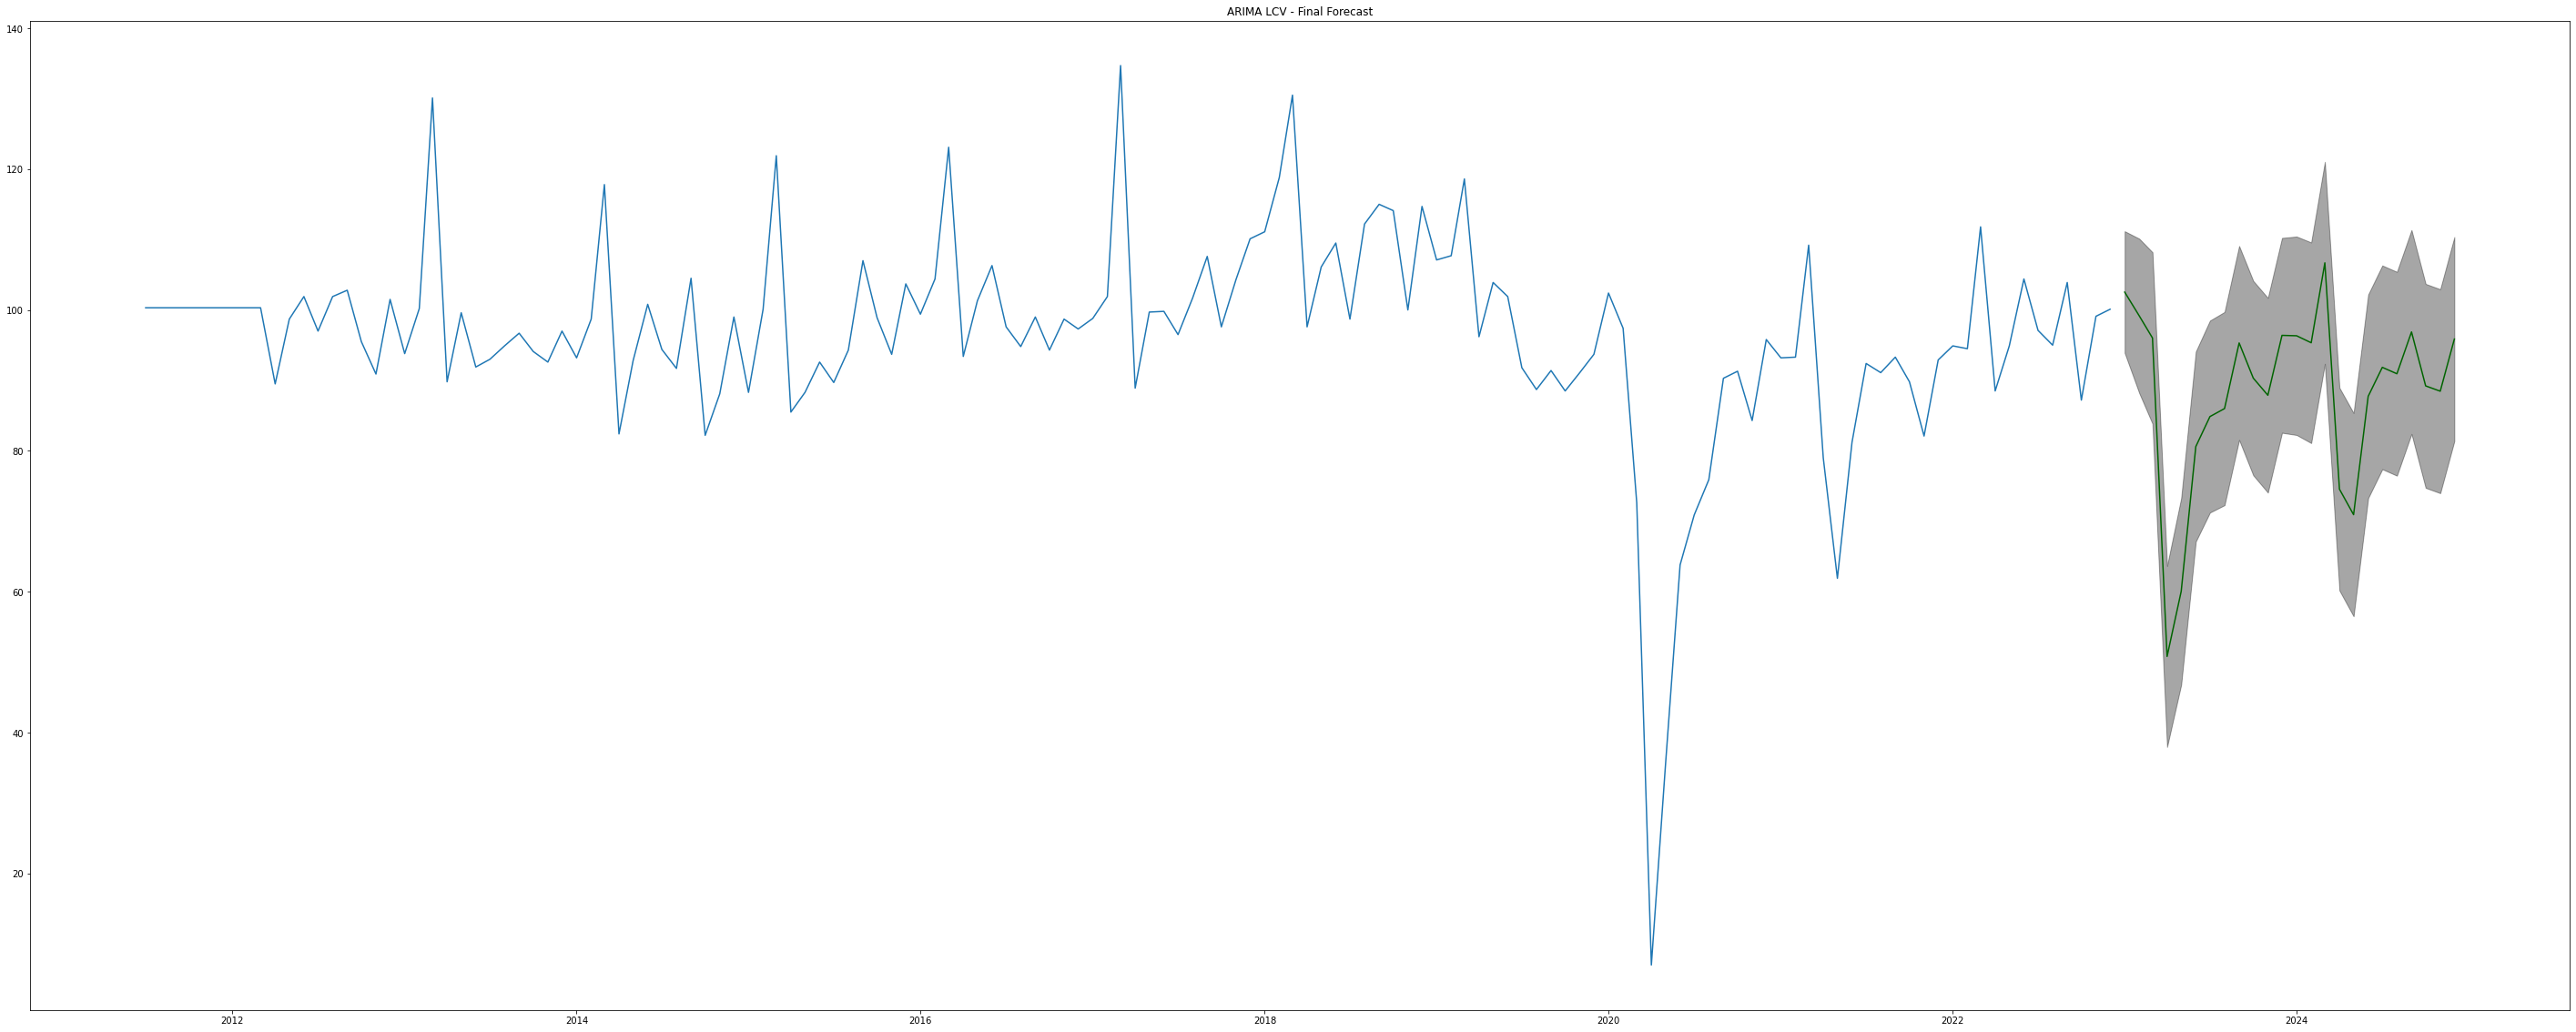

24 PMI
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=765.901, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=686.130, Time=0.22 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=764.131, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=714.656, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=660.324, Time=0.78 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=650.042, Time=0.93 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=651.836, Time=1.94 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=3.43 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=711.051, Time=1.01 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=645.748, Time=1.24 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=655

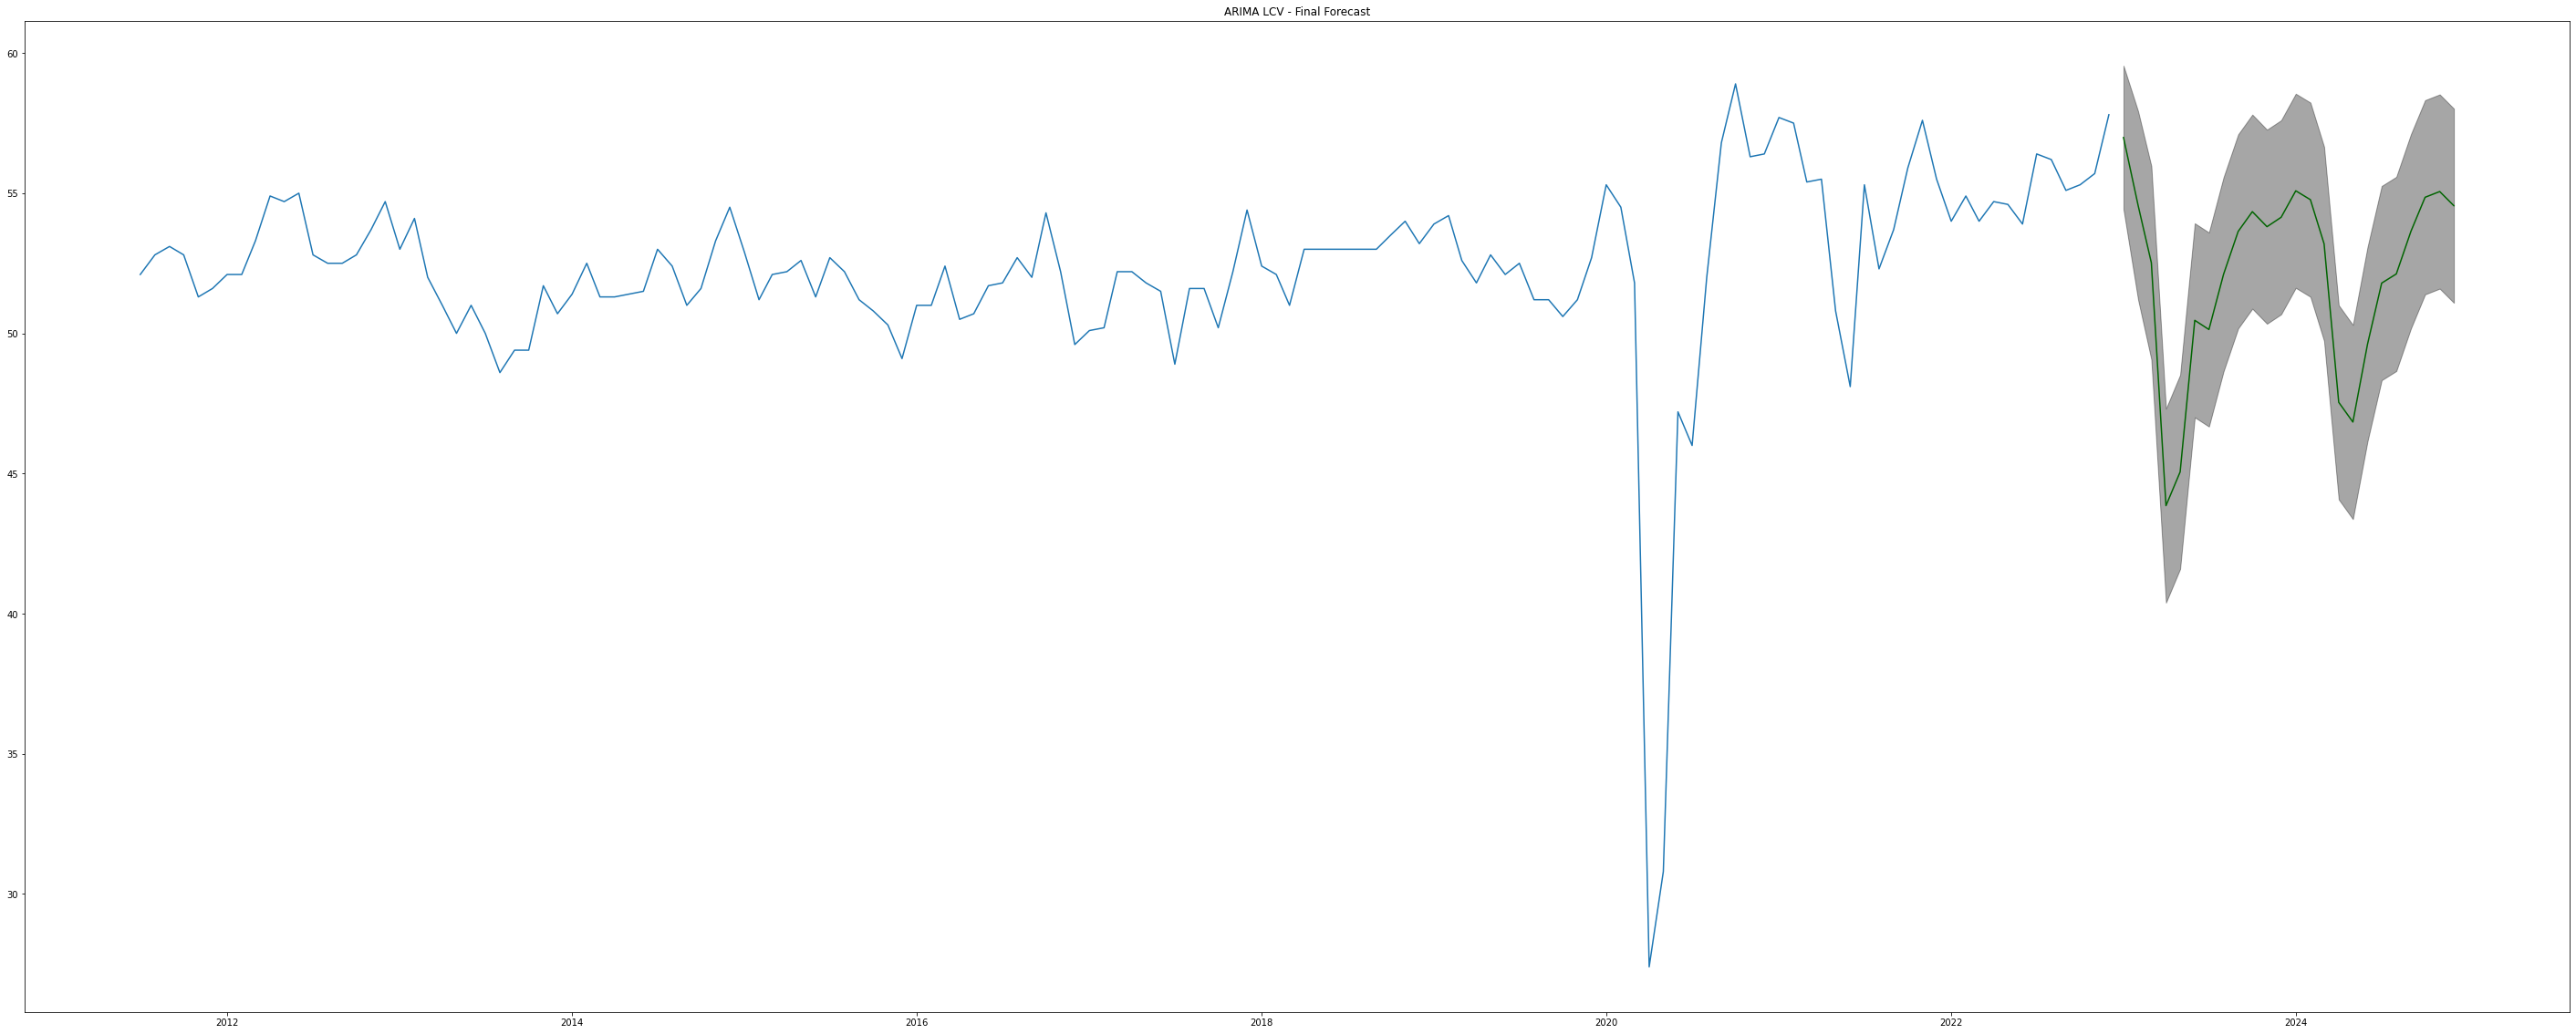

24 COSPI
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3768.468, Time=0.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3792.420, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3772.897, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3767.058, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3792.624, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3769.056, Time=0.23 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3769.056, Time=0.53 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3773.169, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3770.859, Time=1.81 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3771.585, Time=0.20 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3768.926, Time=0.16 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3766.509, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3792.839, Time=0.03 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=3768.507, Time=0.20 sec
 ARIMA(1,1

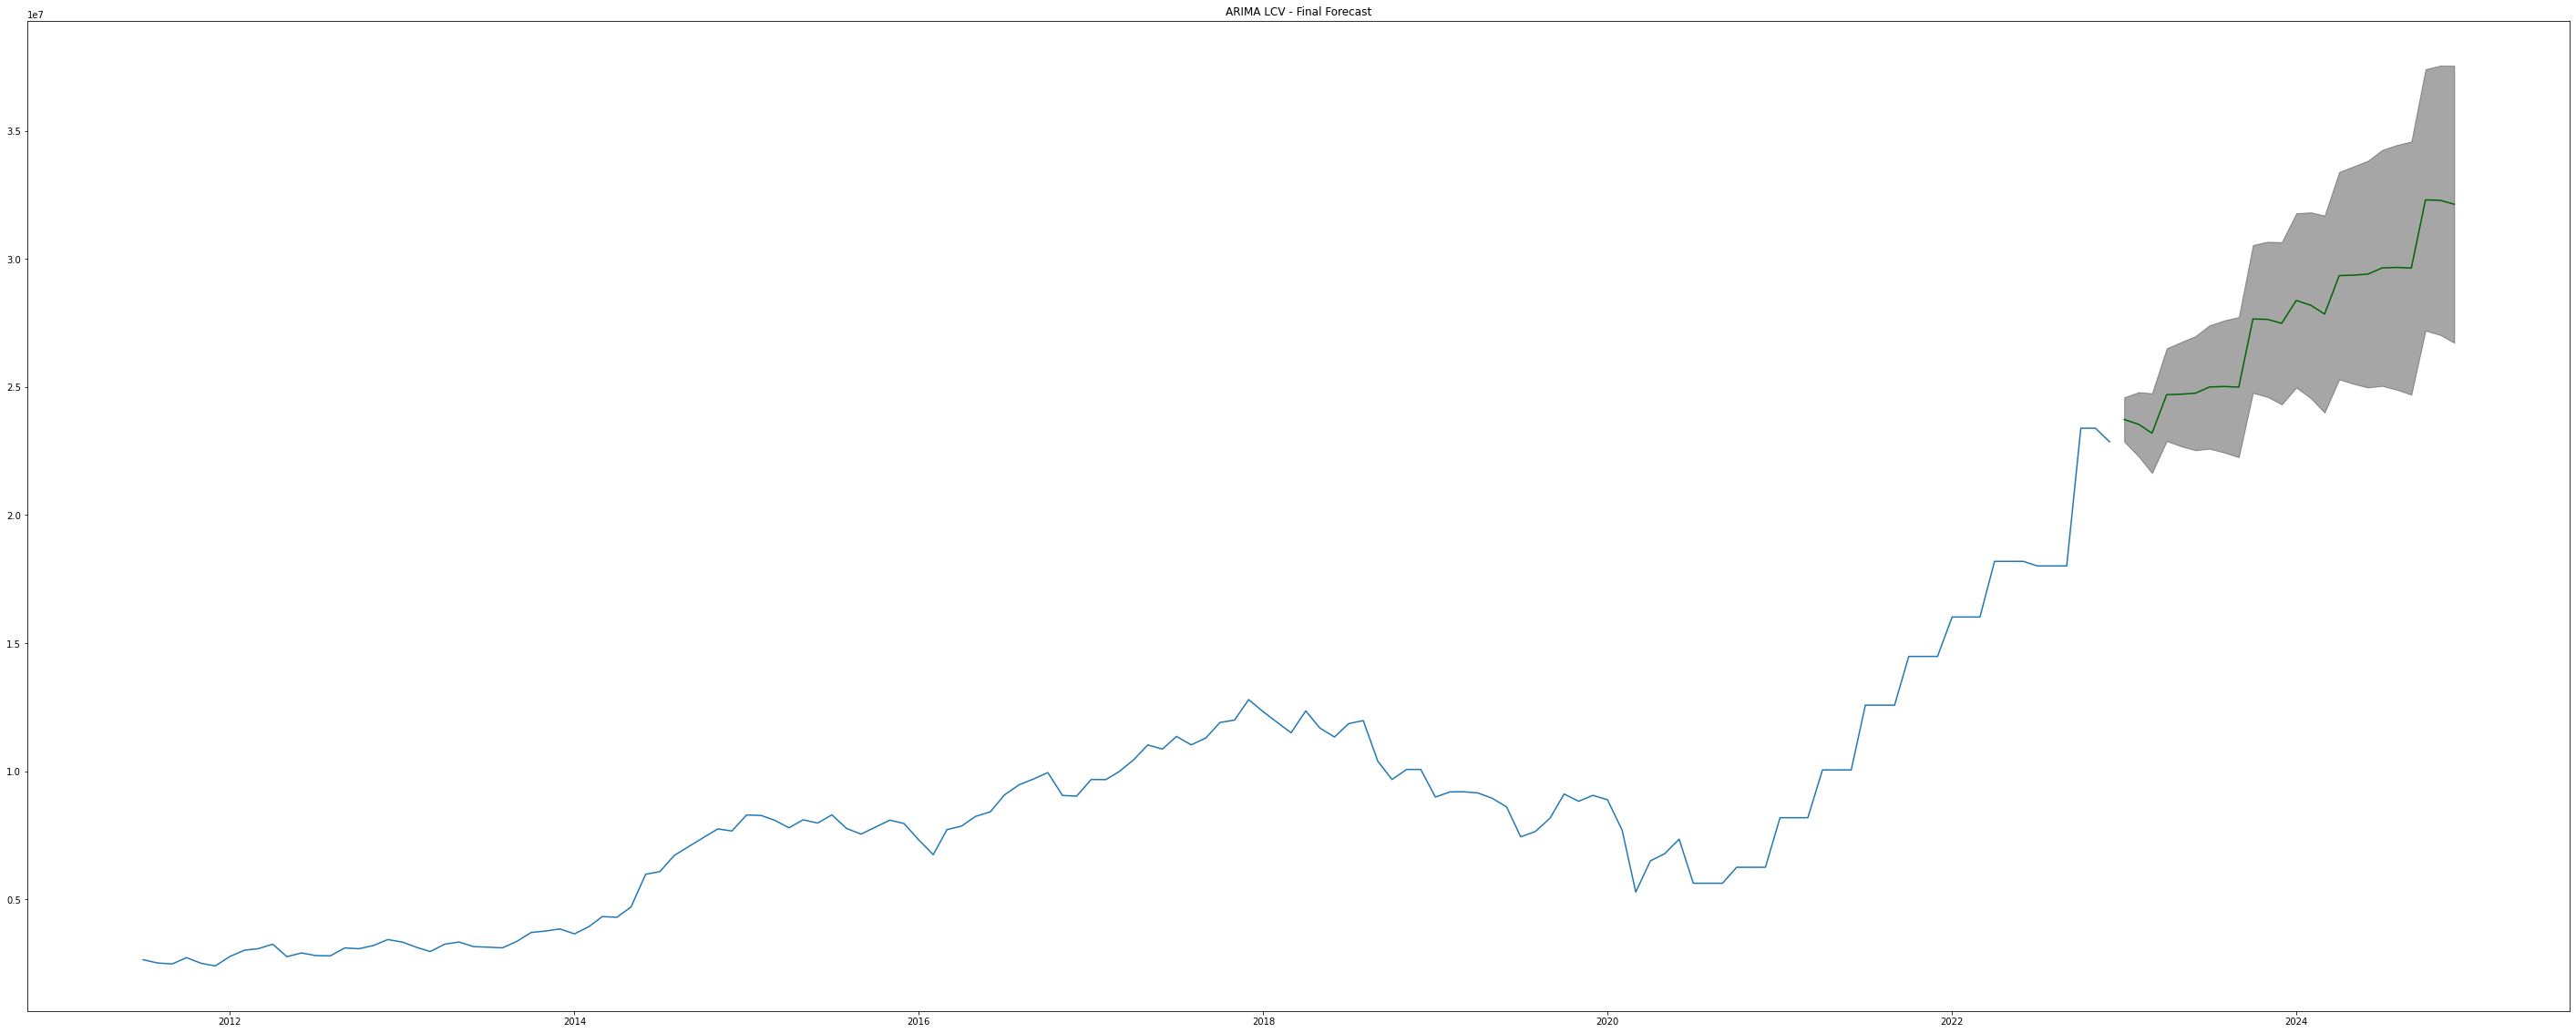

In [20]:
for c in columns_to_forecast:
    #periods of forecast - where we have nan in the series
    h = data[c].isna().sum()
    print(h,c)
#     using the past values for training
    train = data[~data[c].isna()]
    test = data[data[c].isna()]
    train_c = train[c]
    model = auto_arima(train_c, start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True,
                         stepwise=True,alpha=0.35)
    model.fit(train_c)
    forecast = model.predict(n_periods=int(h))
    fitted, confint = model.predict(n_periods=int(h), return_conf_int=True,alpha=0.35)
    print('confidence interval',model.conf_int())
    # make series for plotting purpose
    fitted_series = pd.Series(fitted,index=test.index)
    lower_series = pd.Series(confint[:, 0],index=test.index)
    upper_series = pd.Series(confint[:, 1],index=test.index)
    # Plot
    fig_size = plt.rcParams["figure.figsize"]
    # Set figure width to 12 and height to 9
    fig_size[0] = 50
    fig_size[1] = 20
    plt.rcParams["figure.figsize"] = fig_size
    plt.plot(train_c)
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.35)

    plt.title("ARIMA LCV - Final Forecast")
    plt.show()
    # Storing all high, medium and low forecasted values
    data[c+'_fitted'] = train[c].append(fitted_series)
    data[c+'_lower'] = train[c].append(lower_series)
    data[c+'_upper'] = train[c].append(upper_series)

In [21]:
## Resetting the index after the forecast and mapping

data.to_csv(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\Fiinal Forecast\2Wheeler_Forecast_2023_2024.csv",index=False)